In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from datetime import date
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import six
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [3]:
data = pd.read_csv('data_set_cleaned.csv')
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
variables = data.drop(['grade', 'Unknown/Other', 'UnknownLoE', 'u', 'YoB', 'nevents' ], axis=1)

In [ ]:
correlations = variables.corr()

In [ ]:
correlations.columns

In [ ]:
w, v = np.linalg.eig(correlations)

In [ ]:
df = pd.DataFrame(columns= ['variables', 'w'])

In [ ]:
df['variables'] = correlations.columns
df['w'] = w

In [ ]:
df

In [ ]:
colums = ['viewed', 'explored', 'certified', 'nevents', 'ndays_act',
       'nplay_video', 'nchapters', 'nforum_posts', 'days_active',
       'age']

In [ ]:
n_c = data[colums].corr()

In [ ]:
w, v = np.linalg.eig(n_c)

In [ ]:
df1 = pd.DataFrame(columns= ['variables', 'w'])

In [ ]:
df1['variables'] = n_c.columns
df1['w'] = w

In [ ]:
df1

In [ ]:
variables.columns

In [7]:
excluded_columns = ['course_id','userid_DI', 'certified', 'final_cc_cname_DI', 'start_time_DI', 'last_event_DI', 'LoE_DI','YoB', 'gender','grade'] 

In [23]:
X, y = data.drop(excluded_columns, axis=1), data['grade']

In [9]:
X.columns

Index(['viewed', 'explored', 'nevents', 'ndays_act', 'nplay_video',
       'nchapters', 'nforum_posts', 'Australia', 'Bangladesh', 'Brazil',
       'Canada', 'China', 'Colombia', 'Egypt', 'France', 'Germany', 'Greece',
       'India', 'Indonesia', 'Japan', 'Mexico', 'Morocco', 'Nigeria',
       'Other Africa', 'Other East Asia', 'Other Europe',
       'Other Middle East/Central Asia',
       'Other North & Central Amer., Caribbean', 'Other Oceania',
       'Other South America', 'Other South Asia', 'Pakistan', 'Philippines',
       'Poland', 'Portugal', 'Russian Federation', 'Spain', 'Ukraine',
       'United Kingdom', 'United States', 'Unknown/Other', 'days_active',
       'age', 'Bachelor's', 'Doctorate', 'Less than Secondary', 'Master's',
       'Secondary', 'UnknownLoE', 'f', 'm', 'o', 'u'],
      dtype='object')

In [55]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train, X_test, y_train, y_test = X, X, y, y

In [25]:
X.shape

(583737, 53)

In [26]:
y.shape

(583737,)

In [24]:
# lm = LinearRegression()
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
# predictions = lm.predict(X_test)
# print('MSE:', metrics.mean_squared_error(y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
# print('MAE:', metrics.mean_absolute_error(y_test, predictions))
# print('R2:', metrics.r2_score(y_test, predictions))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
res = pd.DataFrame([[slope, intercept, r_value, p_value, std_err]], columns=['slope', 'intercept', 'r_value', 'p_value', 'std_err'])
res.head()

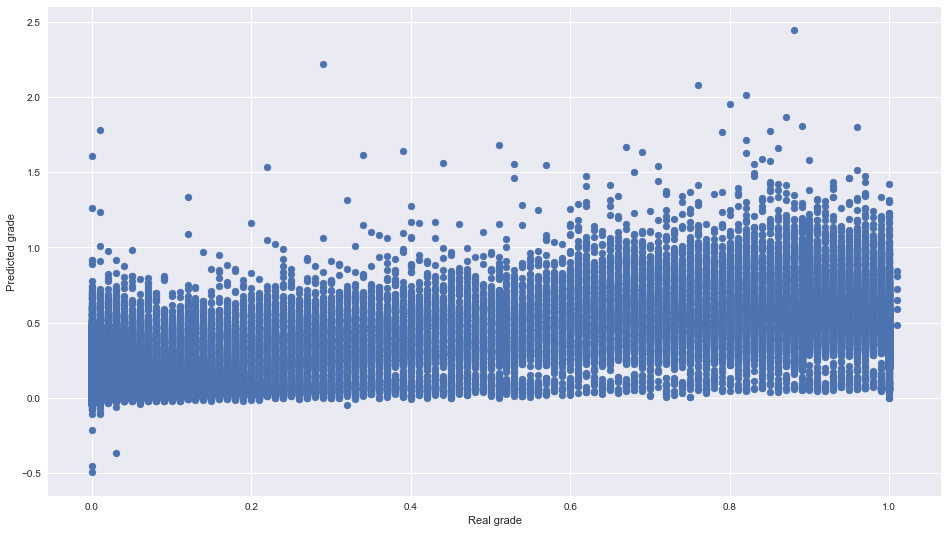

In [13]:
plt.scatter(y_test,predictions)
plt.xlabel('Real grade')
plt.ylabel('Predicted grade')

In [19]:
list(zip(lm.coef_, X.columns))

[(-0.021772034056031935, 'viewed'),
 (0.12638716420108037, 'explored'),
 (3.8675089599220572e-05, 'nevents'),
 (0.0035673277079875942, 'ndays_act'),
 (-7.5482683321411587e-05, 'nplay_video'),
 (0.0089265697436876901, 'nchapters'),
 (-0.0090250132424256647, 'nforum_posts'),
 (0.0039629719187019435, 'Australia'),
 (-0.0032999518262443878, 'Bangladesh'),
 (-0.0014713443901817602, 'Brazil'),
 (-0.0026081468642483556, 'Canada'),
 (0.00092196993368459852, 'China'),
 (-0.0013772762401212247, 'Colombia'),
 (-0.0035694164799626353, 'Egypt'),
 (0.0035792275904442785, 'France'),
 (0.0051036124347658991, 'Germany'),
 (0.0036427660249855323, 'Greece'),
 (0.0051321233062332858, 'India'),
 (-0.00019186729136867558, 'Indonesia'),
 (-0.0065906971142115963, 'Japan'),
 (-0.0039338809139947877, 'Mexico'),
 (-0.0017815682741983791, 'Morocco'),
 (0.0021194898734627548, 'Nigeria'),
 (0.0020718358551666794, 'Other Africa'),
 (-0.0028449133882425936, 'Other East Asia'),
 (-0.0026435970651832903, 'Other Europe'

In [15]:
lm.intercept_

-0.011674879587808065

In [ ]:
lm.